##### --- Carga librerias---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

import missingno as msno
import plotly.express as px
# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

##### --- Carga el dataset ---

In [2]:
df = pd.read_csv('Comorbilidades.txt', sep = '|')

#### --- Obtener número de Instancias y atributos del Dataset ---

In [3]:
df.shape

(2038, 4)

In [4]:
df.head()

fecha_egreso  erc  dm2  hta
0   2018-01-01  189   54   16
1   2018-01-02  384   84   24
2   2018-01-03  414  100   33
3   2018-01-04  396  135   36
4   2018-01-05  447  114   45

In [5]:
df.dtypes

fecha_egreso    object
erc              int64
dm2              int64
hta              int64
dtype: object

In [6]:
df['fecha_egreso']=pd.to_datetime(df['fecha_egreso'])

In [7]:
df.dtypes

fecha_egreso    datetime64[ns]
erc                      int64
dm2                      int64
hta                      int64
dtype: object

In [8]:
df=df.set_index('fecha_egreso')

In [9]:
df['anio'] = df.index.year

In [10]:
df['mes']=df.index.month

#### --- Muestra los primeros registros del dataset ---

In [11]:
df.head()

erc  dm2  hta  anio  mes
fecha_egreso                          
2018-01-01    189   54   16  2018    1
2018-01-02    384   84   24  2018    1
2018-01-03    414  100   33  2018    1
2018-01-04    396  135   36  2018    1
2018-01-05    447  114   45  2018    1

##### --- Mostrar atributos y datos generales del DataSet ---

In [12]:
df.describe()

erc          dm2          hta         anio          mes
count  2038.000000  2038.000000  2038.000000  2038.000000  2038.000000
mean    305.199215    88.019136    32.071148  2020.312071     6.263003
std      96.173631    31.077146    12.357081     1.622062     3.415221
min       8.000000    15.000000     3.000000  2018.000000     1.000000
25%     236.000000    63.000000    22.000000  2019.000000     3.000000
50%     325.000000    87.000000    32.000000  2020.000000     6.000000
75%     371.000000   115.000000    41.000000  2022.000000     9.000000
max     528.000000   161.000000    66.000000  2023.000000    12.000000

##### --- Validar si hay regisros nulos ---

In [13]:
#df.isnull().sum()

<AxesSubplot:xlabel='erc', ylabel='count'>

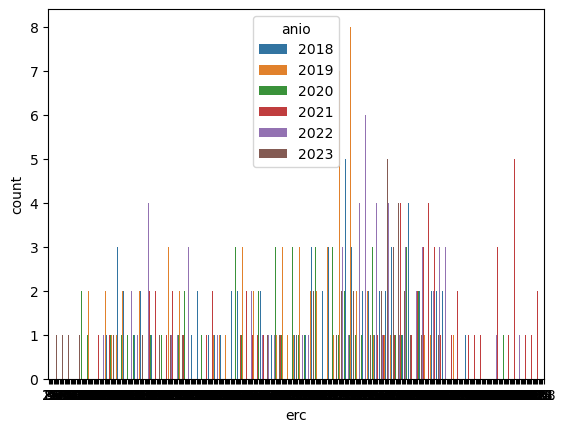

In [14]:
sb.countplot(x='erc', data=df, hue = df['anio'])

<AxesSubplot:>

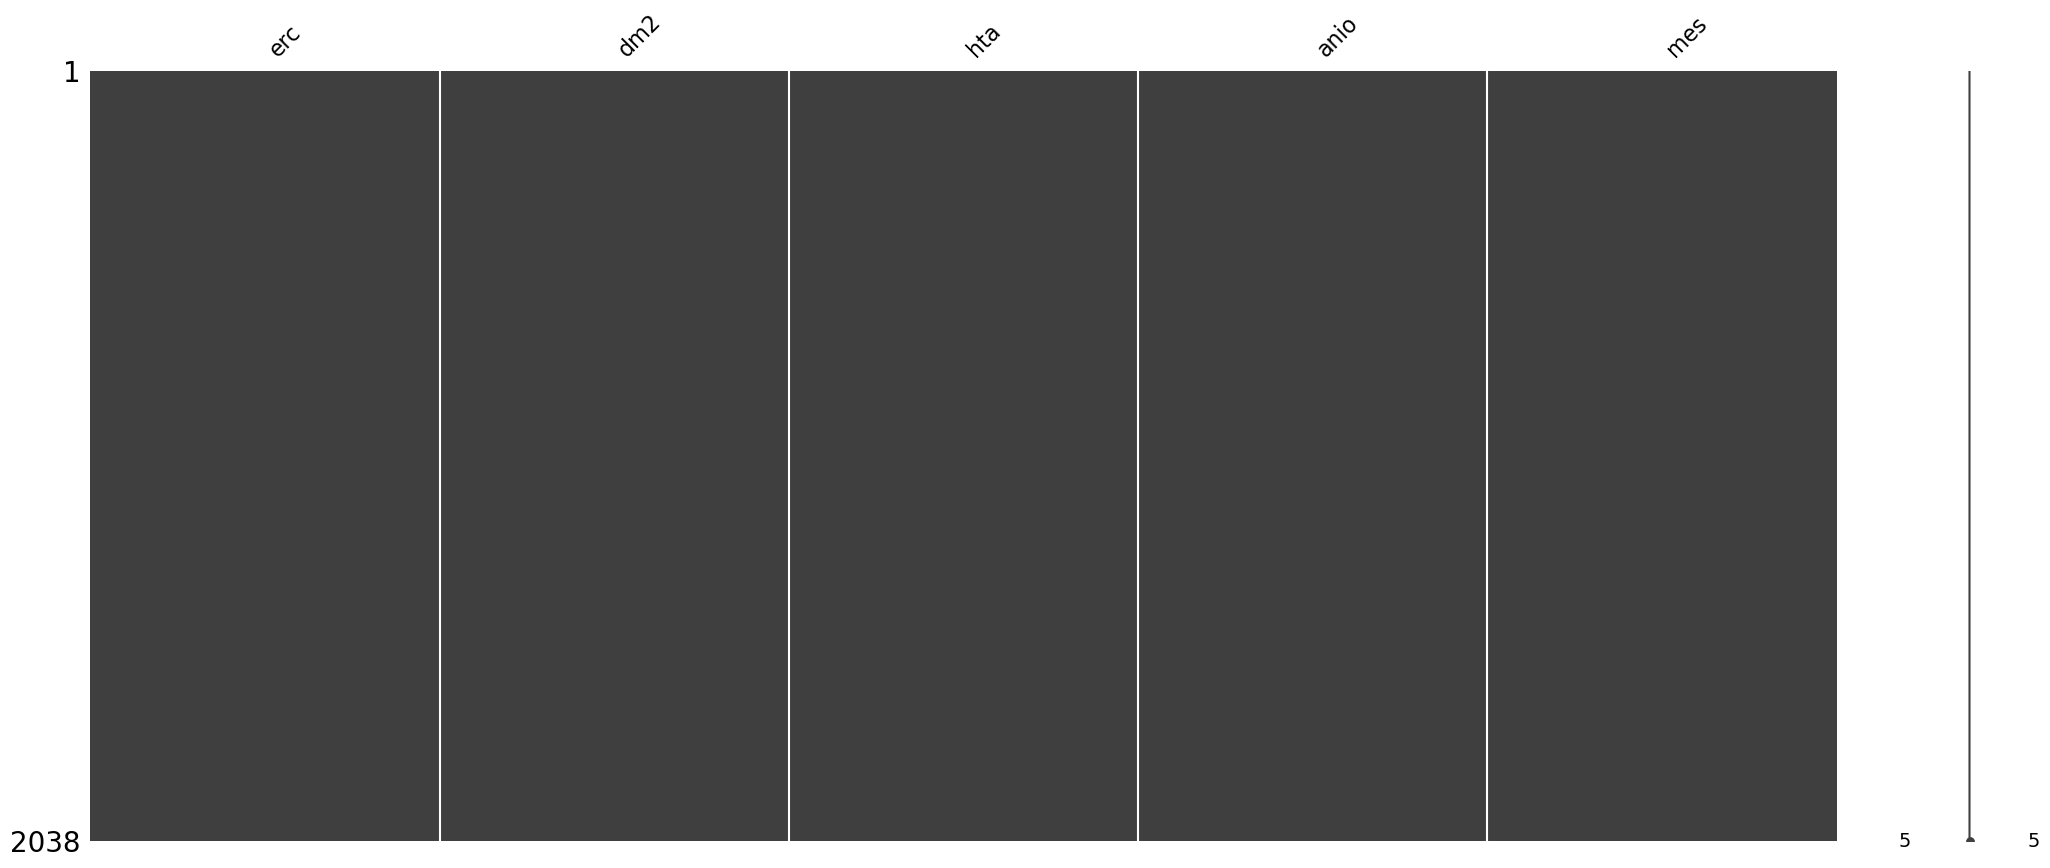

In [15]:
msno.matrix(df)

array([[<AxesSubplot:xlabel='erc', ylabel='erc'>,
        <AxesSubplot:xlabel='dm2', ylabel='erc'>,
        <AxesSubplot:xlabel='hta', ylabel='erc'>,
        <AxesSubplot:xlabel='anio', ylabel='erc'>,
        <AxesSubplot:xlabel='mes', ylabel='erc'>],
       [<AxesSubplot:xlabel='erc', ylabel='dm2'>,
        <AxesSubplot:xlabel='dm2', ylabel='dm2'>,
        <AxesSubplot:xlabel='hta', ylabel='dm2'>,
        <AxesSubplot:xlabel='anio', ylabel='dm2'>,
        <AxesSubplot:xlabel='mes', ylabel='dm2'>],
       [<AxesSubplot:xlabel='erc', ylabel='hta'>,
        <AxesSubplot:xlabel='dm2', ylabel='hta'>,
        <AxesSubplot:xlabel='hta', ylabel='hta'>,
        <AxesSubplot:xlabel='anio', ylabel='hta'>,
        <AxesSubplot:xlabel='mes', ylabel='hta'>],
       [<AxesSubplot:xlabel='erc', ylabel='anio'>,
        <AxesSubplot:xlabel='dm2', ylabel='anio'>,
        <AxesSubplot:xlabel='hta', ylabel='anio'>,
        <AxesSubplot:xlabel='anio', ylabel='anio'>,
        <AxesSubplot:xlabel='mes', ylab

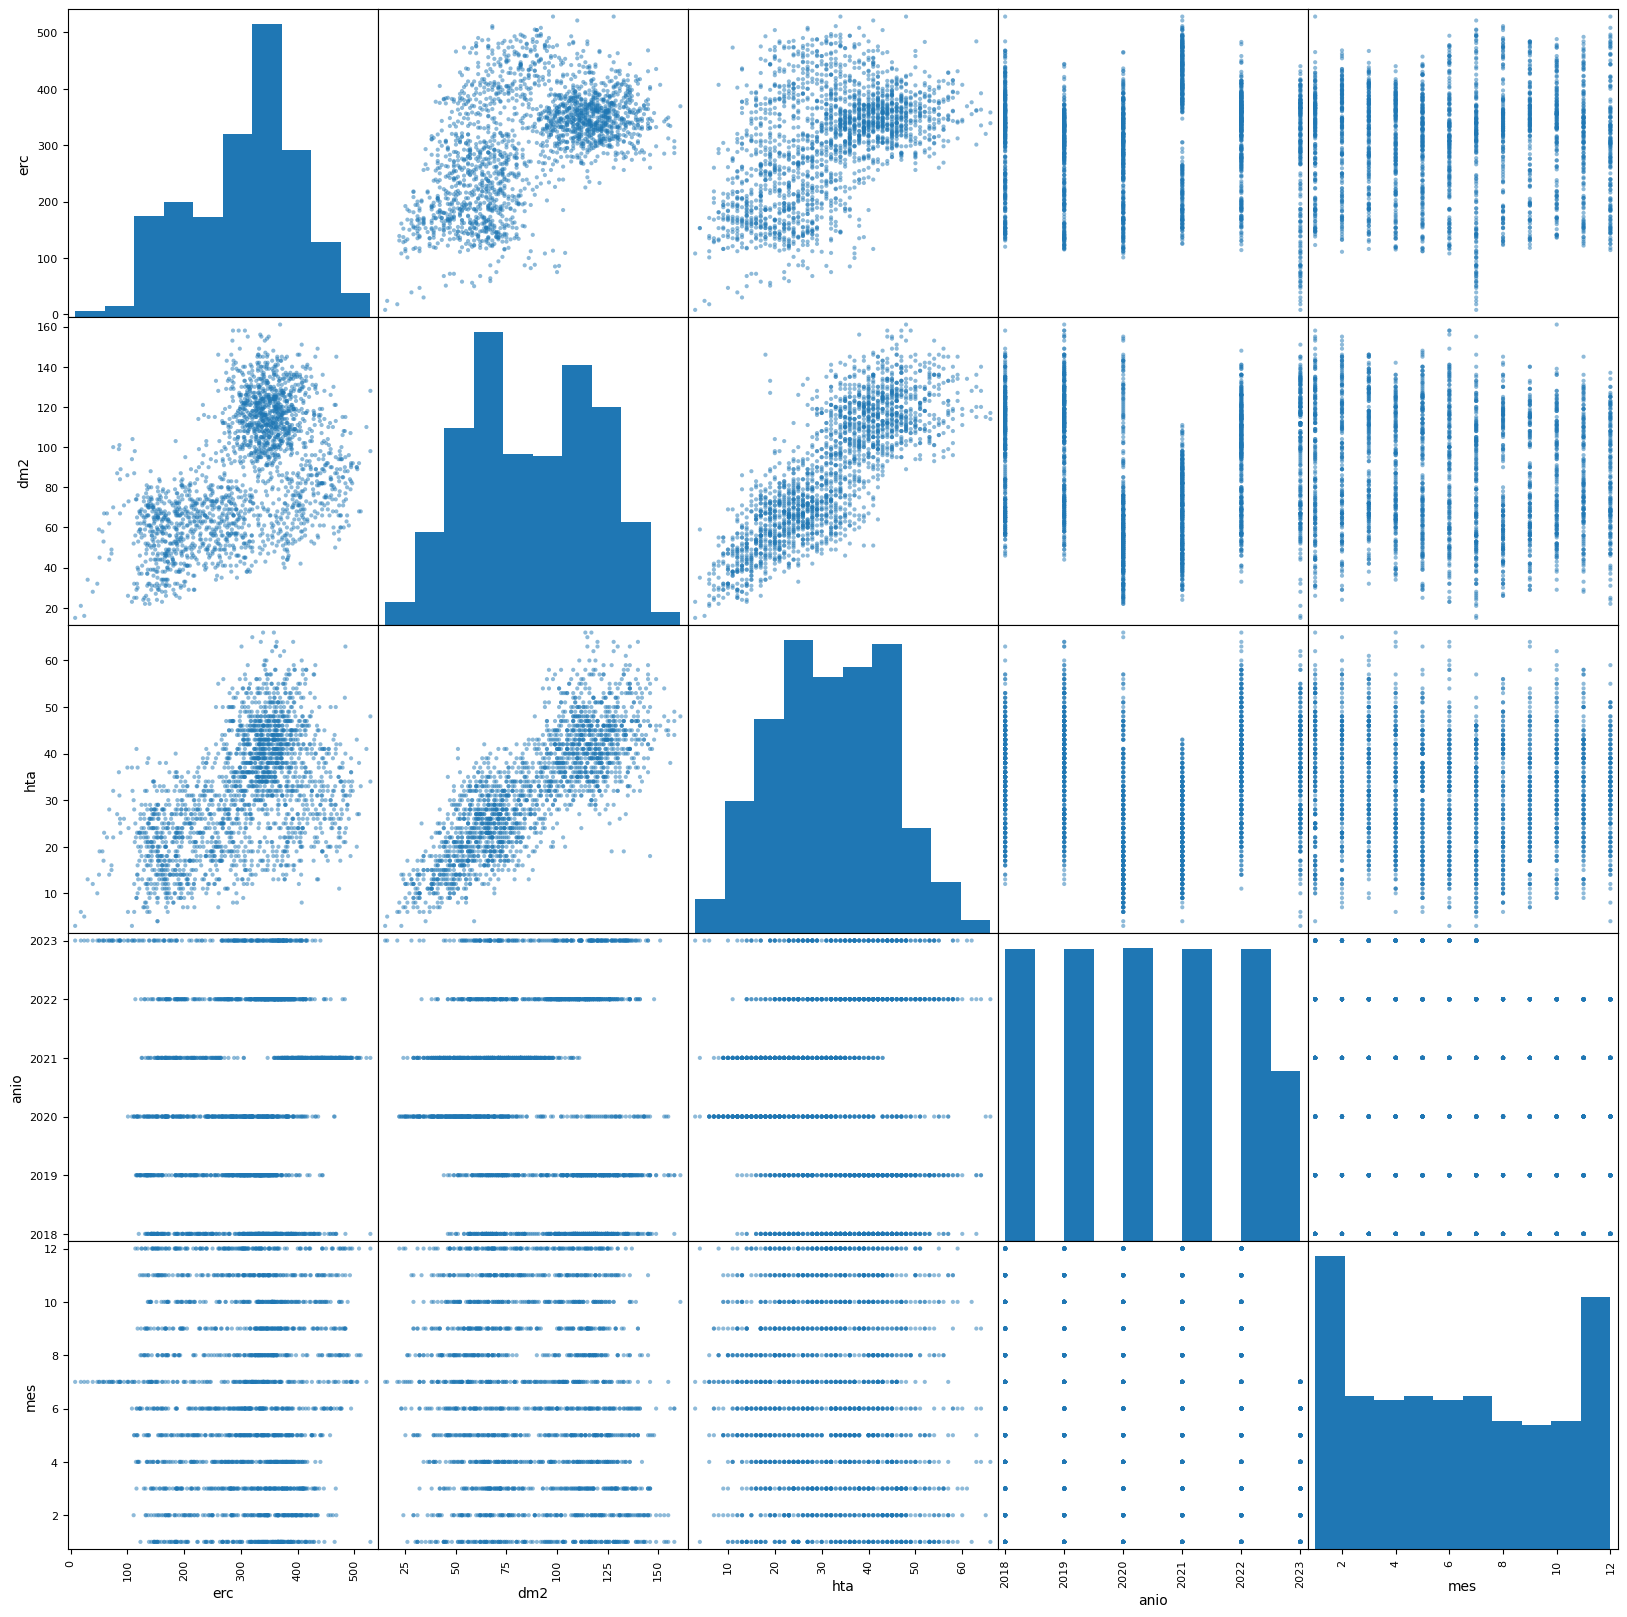

In [16]:
scatter_matrix(df,figsize=(20,20))

In [17]:
#frm=np.triu(np.ones_like(mc,dtype=bool))

In [18]:
df2= df[['hta','dm2','erc']]

<AxesSubplot:>

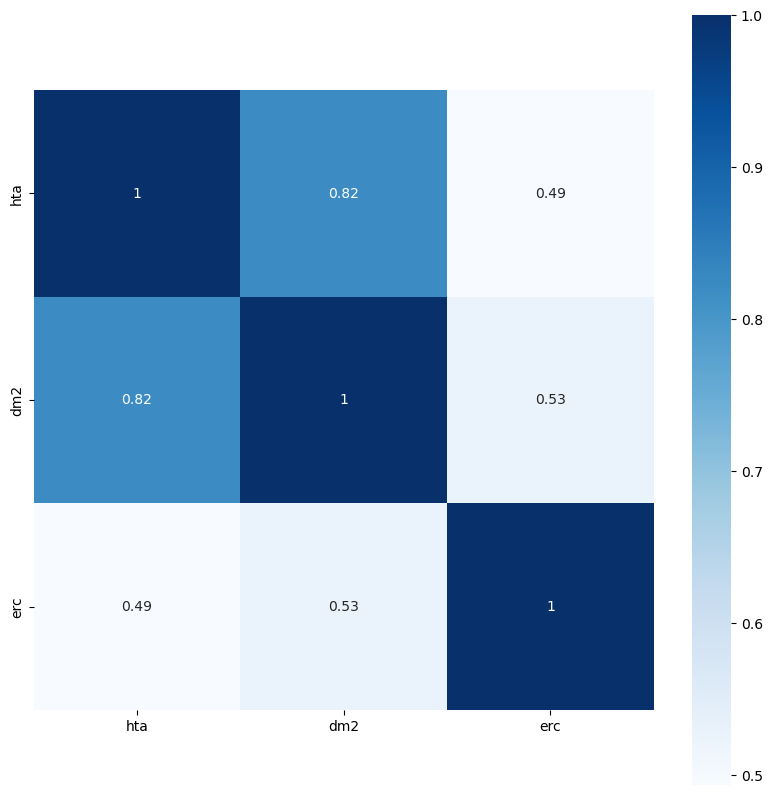

In [19]:
vCorrelation=df2.corr()
plt.figure(figsize=(10,10))
sb.heatmap(vCorrelation[['hta','dm2','erc']], vmax=1, square=True, annot=True, cmap='Blues')

<AxesSubplot:xlabel='hta', ylabel='dm2'>

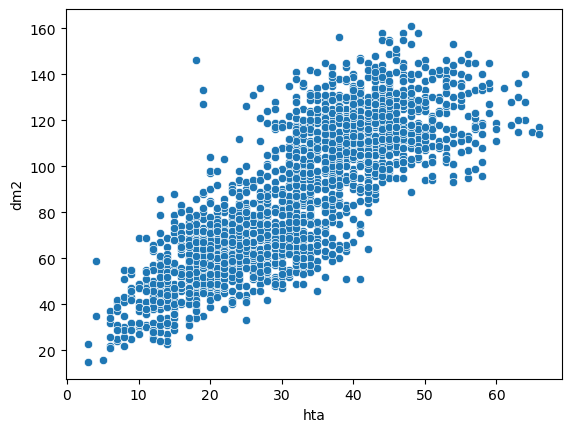

In [20]:
sb.scatterplot(x='hta', y='dm2', data=df)

<AxesSubplot:xlabel='fecha_egreso', ylabel='erc'>

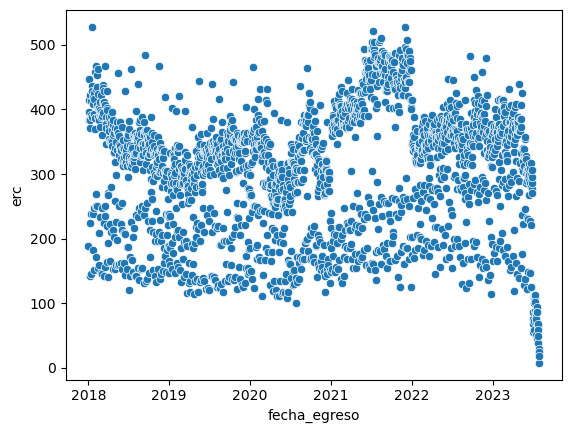

In [21]:
sb.scatterplot(x='fecha_egreso', y='erc', data=df)

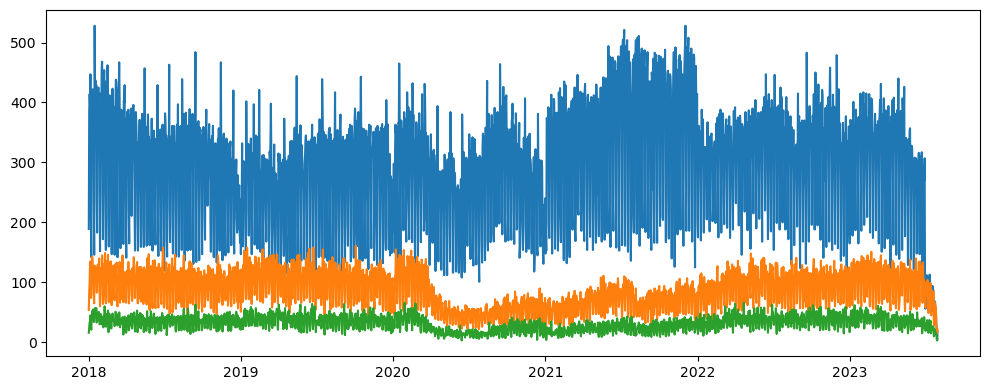

In [22]:
plt.subplots(figsize=(10, 4))


plt.plot(df.erc)
plt.plot(df.dm2)
plt.plot(df.hta)


plt.tight_layout();

<AxesSubplot:>

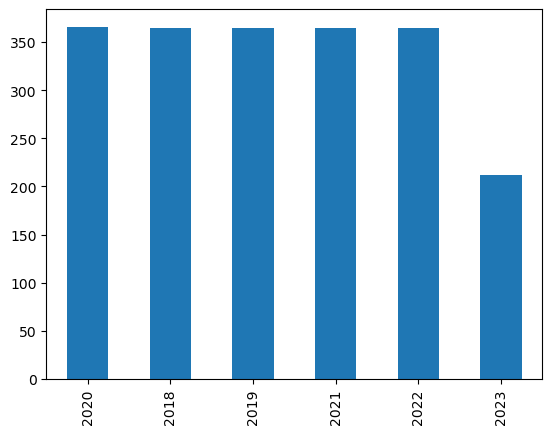

In [23]:
df['anio'].value_counts().plot(kind = 'bar')

In [24]:
#list_plot = ['erc']

In [25]:
#for i in list_plot:
#fig, ax = plt.subplots(figsize=(20,7))
#sb.lineplot(data=df, y='erc', x='fecha_egreso', linewidth=0.7)
#plt.show()

In [26]:
fig = px.line(df,x=df.index, y='erc')
fig.show()

In [27]:
fig = px.line(df,x=df.index, y='dm2')
fig.show()

In [28]:
fig = px.line(df,x=df.index, y='hta')
fig.show()

<AxesSubplot:ylabel='Density'>

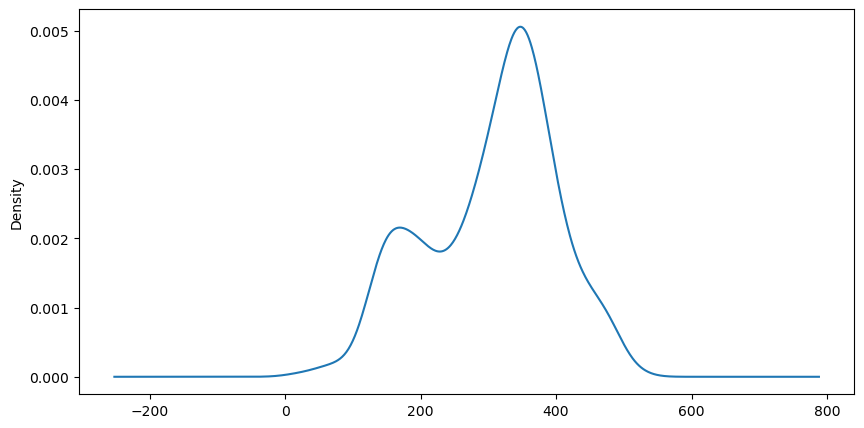

In [29]:
df['erc'].plot(kind='kde', figsize = (10,5))

<AxesSubplot:ylabel='Density'>

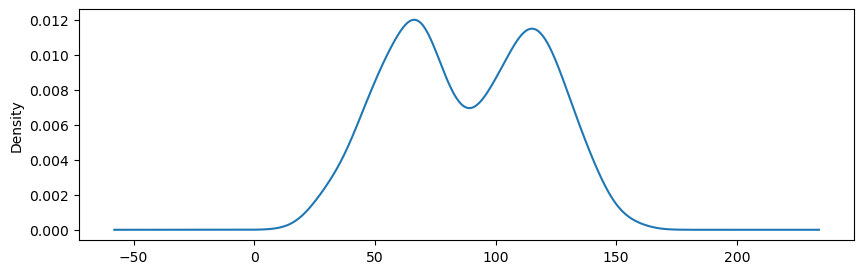

In [30]:
df['dm2'].plot(kind='kde', figsize = (10,3))

<AxesSubplot:ylabel='Density'>

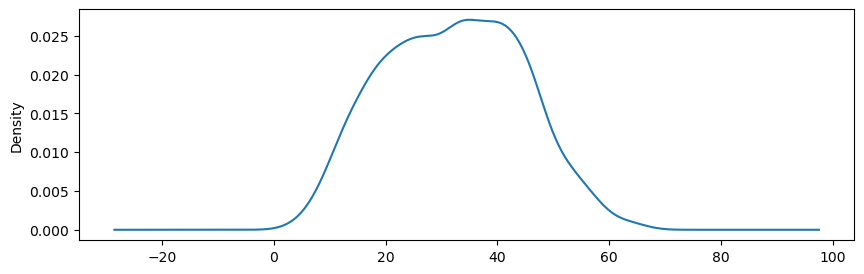

In [31]:
df['hta'].plot(kind='kde', figsize = (10,3))

In [32]:
df['erc'].describe()

count    2038.000000
mean      305.199215
std        96.173631
min         8.000000
25%       236.000000
50%       325.000000
75%       371.000000
max       528.000000
Name: erc, dtype: float64

In [33]:
#datos=df.copy()
#fig, ax = plt.subplots(figsize=(10,3))
#datos.boxplot(column='erc', by='anio', ax=ax, color="blue" )
#datos.groupby('anio')['erc'].median().plot(style='o-', linewidth=0.8, ax=ax)
#ax.set_ylabel('egresos anio')
#ax.set_title('Distribución de egresos por anio')
#fig.suptitle('')

Text(0.5, 0.98, '')

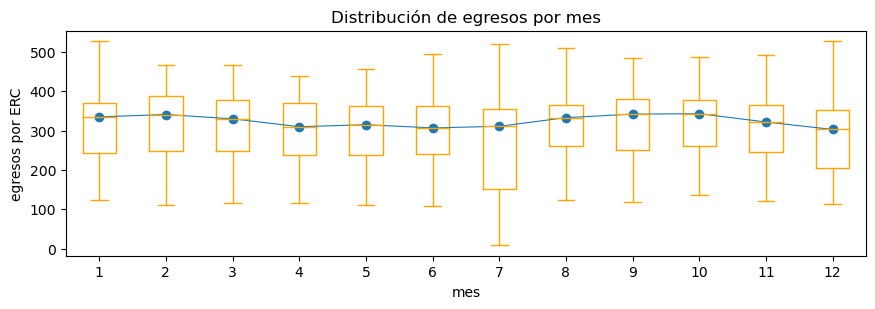

In [34]:
datos=df.copy()
fig, ax = plt.subplots(figsize=(10,3))
datos.boxplot(column="erc", by='mes', ax=ax, color="orange" )
datos.groupby('mes')["erc"].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('egresos por ERC')
ax.set_title('Distribución de egresos por mes')
fig.suptitle('')


Text(0.5, 0.98, '')

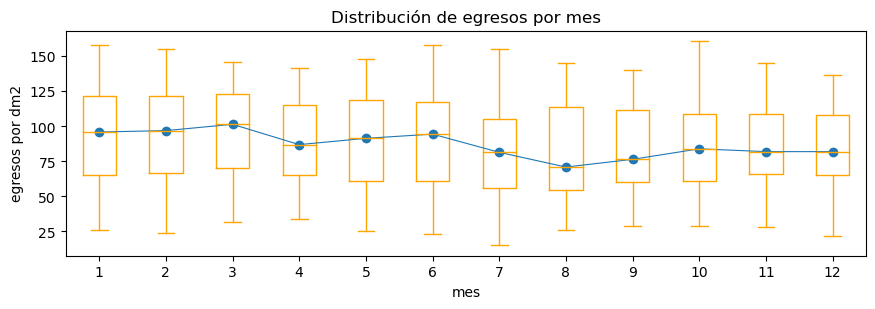

In [35]:
datos=df.copy()
fig, ax = plt.subplots(figsize=(10,3))
datos.boxplot(column="dm2", by='mes', ax=ax, color="orange" )
datos.groupby('mes')["dm2"].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('egresos por dm2')
ax.set_title('Distribución de egresos por mes')
fig.suptitle('')

Text(0.5, 0.98, '')

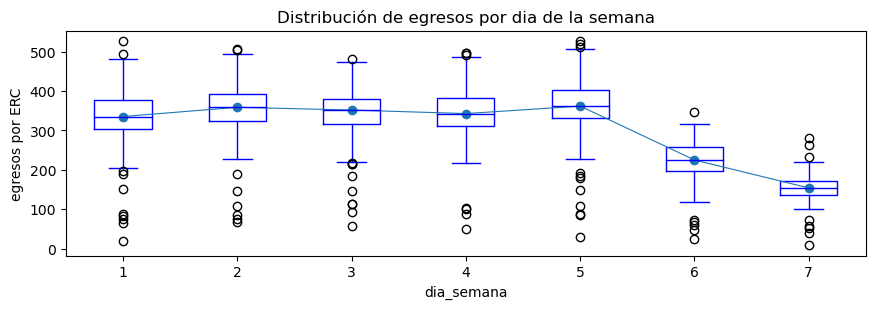

In [36]:
datos=df.copy()
fig, ax = plt.subplots(figsize=(10,3))
datos['dia_semana']=datos.index.day_of_week+1
datos.boxplot(column="erc", by='dia_semana', ax=ax, color="blue" )
datos.groupby('dia_semana')["erc"].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('egresos por ERC')
ax.set_title('Distribución de egresos por dia de la semana')
fig.suptitle('')

Text(0.5, 0.98, '')

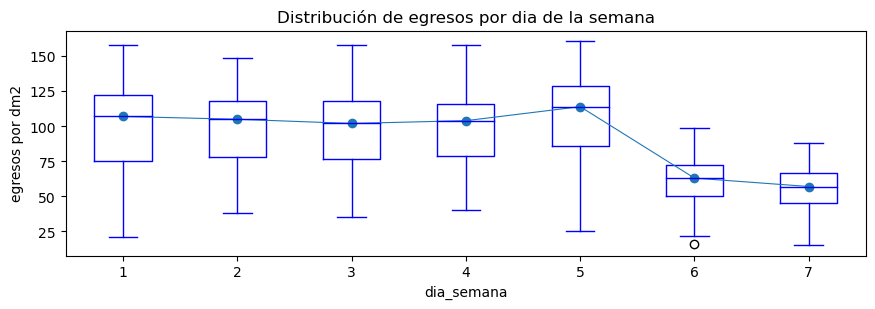

In [37]:
datos=df.copy()
fig, ax = plt.subplots(figsize=(10,3))
datos['dia_semana']=datos.index.day_of_week+1
datos.boxplot(column="dm2", by='dia_semana', ax=ax, color="blue" )
datos.groupby('dia_semana')["dm2"].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('egresos por dm2')
ax.set_title('Distribución de egresos por dia de la semana')
fig.suptitle('')

In [38]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [39]:
Prueba_Dickey_Fuller(df["erc"],"erc")
Prueba_Dickey_Fuller(df["dm2"],"dm2")
Prueba_Dickey_Fuller(df["hta"],"hta")

Resultados de la prueba de Dickey-Fuller para columna: erc
Test Statistic                          -0.891018
p-value                                  0.790916
No Lags Used                            23.000000
Número de observaciones utilizadas    2014.000000
Critical Value (1%)                     -3.433601
Critical Value (5%)                     -2.862976
Critical Value (10%)                    -2.567535
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios
Resultados de la prueba de Dickey-Fuller para columna: dm2
Test Statistic                          -1.828924
p-value                                  0.366199
No Lags Used                            25.000000
Número de observaciones utilizadas    2012.000000
Critical Value (1%)                     -3.433604
Critical Value (5%)                     -2.862978
Critical Value (10%)                    -2.567535
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos

In [40]:
df1=df.copy()
# Take first difference
df1['erc_dif'] = df['erc'].diff()
df1['dm2_dif'] = df['dm2'].diff()
df1['hta_dif'] = df['hta'].diff()

# Remove the first data point
df1.dropna(inplace=True)

# Take a look at the head of the dataset
df1.head()

erc  dm2  hta  anio  mes  erc_dif  dm2_dif  hta_dif
fecha_egreso                                                     
2018-01-02    384   84   24  2018    1    195.0     30.0      8.0
2018-01-03    414  100   33  2018    1     30.0     16.0      9.0
2018-01-04    396  135   36  2018    1    -18.0     35.0      3.0
2018-01-05    447  114   45  2018    1     51.0    -21.0      9.0
2018-01-06    224   74   28  2018    1   -223.0    -40.0    -17.0

In [41]:
Prueba_Dickey_Fuller(df1["erc_dif"],"erc_dif")
Prueba_Dickey_Fuller(df1["dm2_dif"],"dm2_dif")
Prueba_Dickey_Fuller(df1["hta_dif"],"hta_dif")

Resultados de la prueba de Dickey-Fuller para columna: erc_dif
Test Statistic                       -1.259051e+01
p-value                               1.825556e-23
No Lags Used                          2.600000e+01
Número de observaciones utilizadas    2.010000e+03
Critical Value (1%)                  -3.433608e+00
Critical Value (5%)                  -2.862979e+00
Critical Value (10%)                 -2.567536e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios
Resultados de la prueba de Dickey-Fuller para columna: dm2_dif
Test Statistic                       -1.218901e+01
p-value                               1.298661e-22
No Lags Used                          2.600000e+01
Número de observaciones utilizadas    2.010000e+03
Critical Value (1%)                  -3.433608e+00
Critical Value (5%)                  -2.862979e+00
Critical Value (10%)                 -2.567536e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son 

In [42]:
#fig=px.line(df1, x=df1.index.week, y='hta_dif', title='erc')
#fig.show()

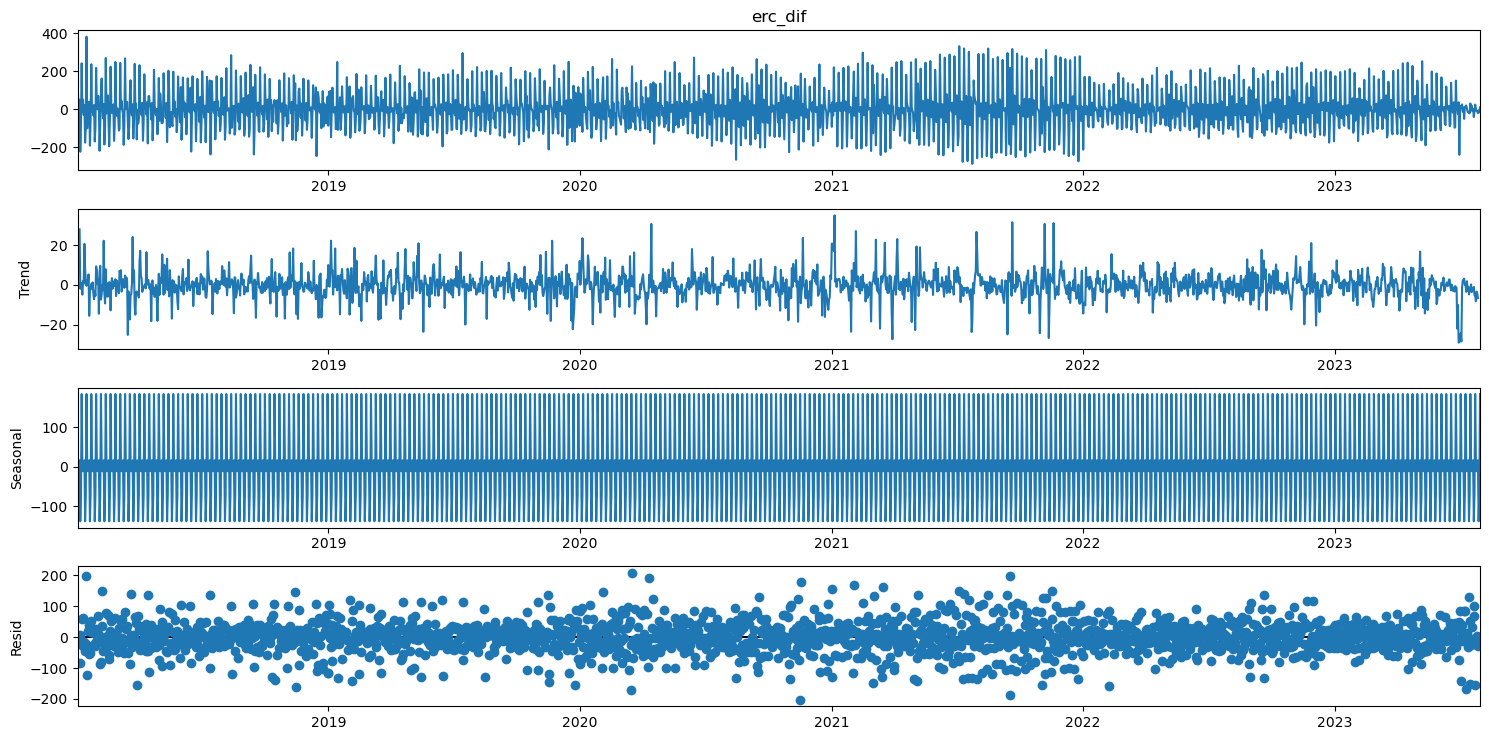

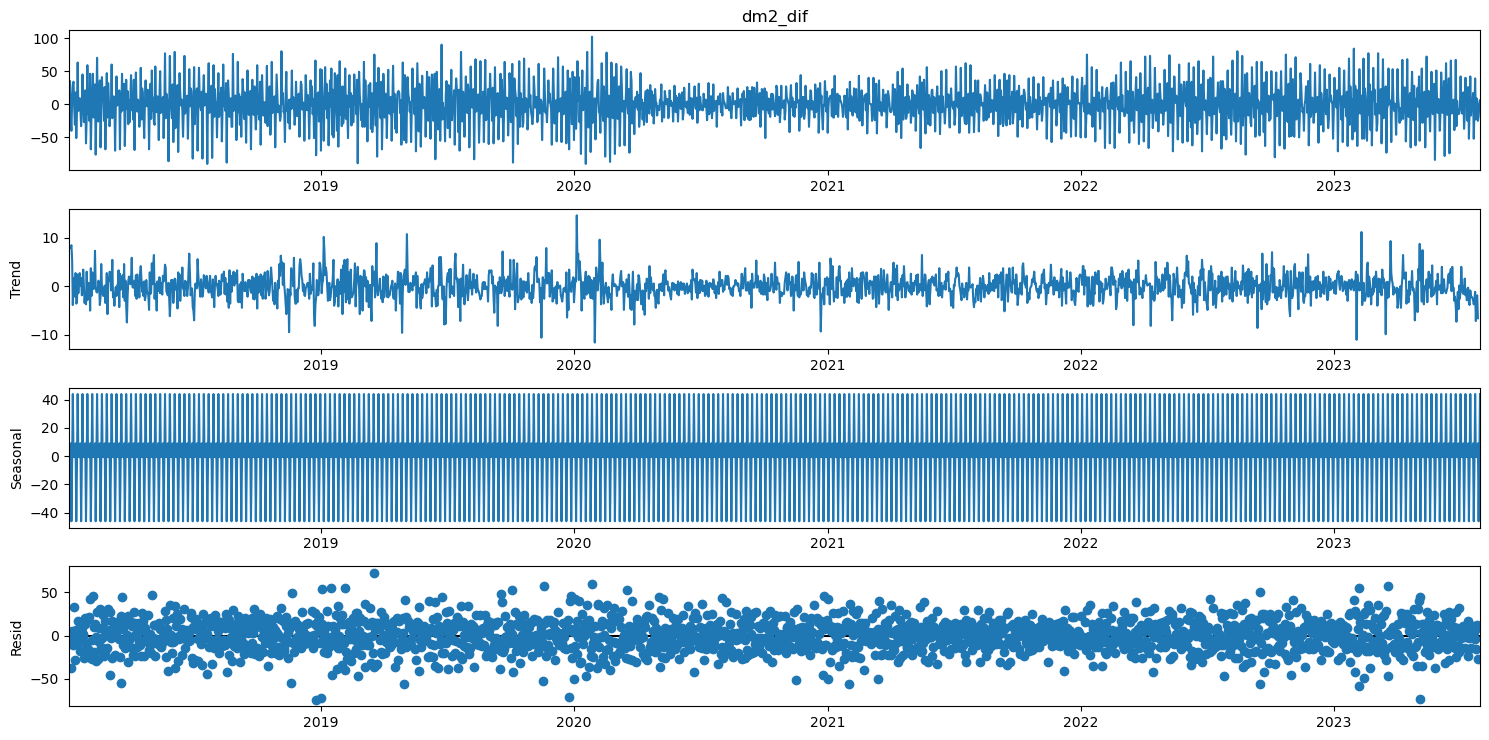

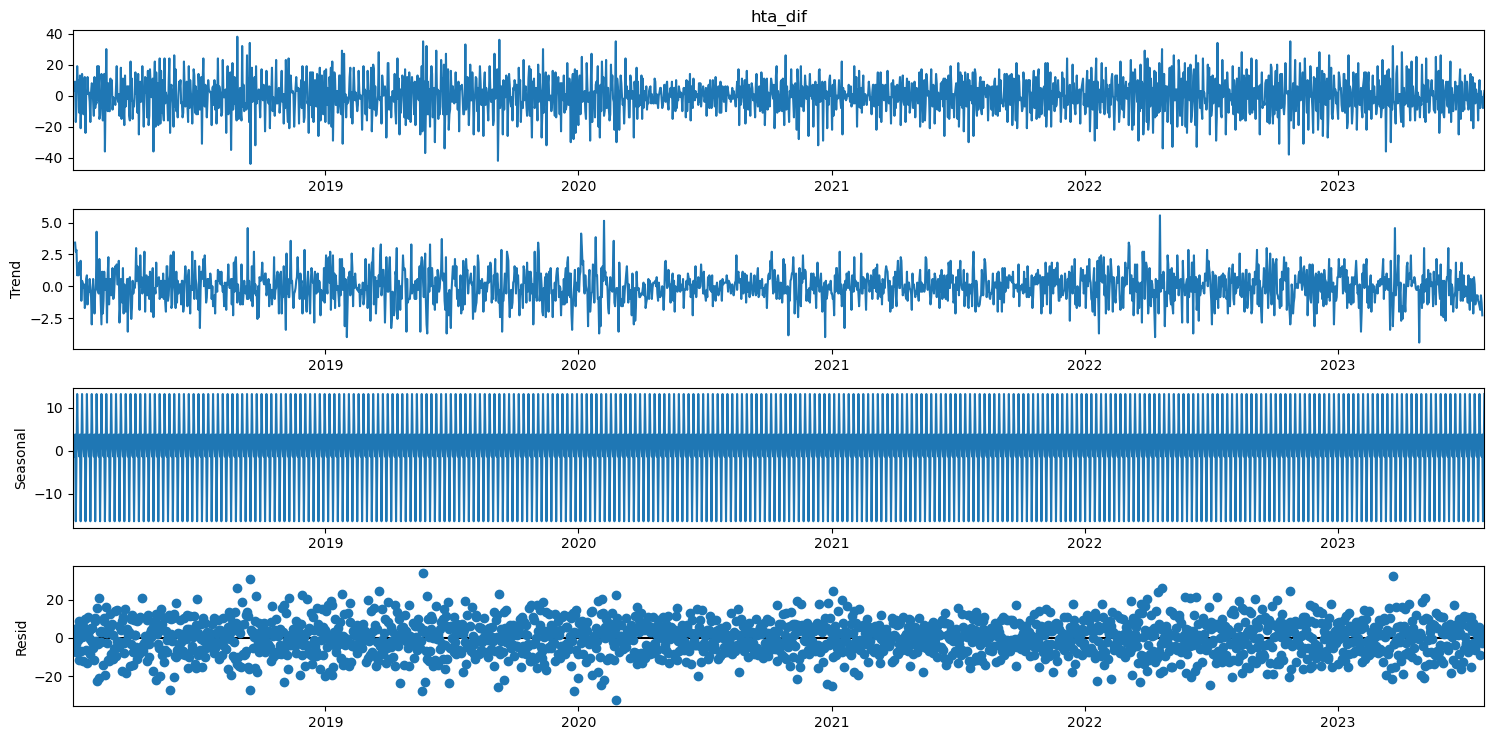

In [43]:
#df = df.set_index('fecha_egreso').asfreq('Y').dropna()
plt.rcParams["figure.figsize"] = (15, 7.5)
a = seasonal_decompose(df1["erc_dif"], model = "add")
b = seasonal_decompose(df1["dm2_dif"], model = "add")
c = seasonal_decompose(df1["hta_dif"], model = "add")

a.plot();
b.plot();
c.plot();

<function matplotlib.pyplot.show(close=None, block=None)>

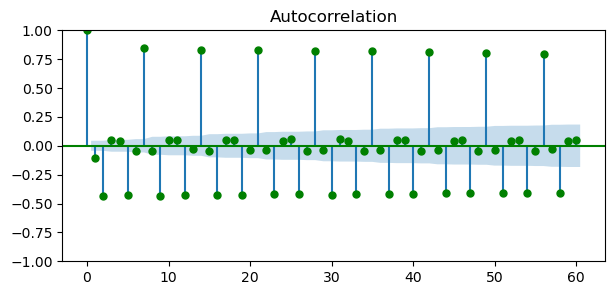

In [44]:
fig, ax = plt.subplots(figsize=(7,3))
plot_acf(df1['erc_dif'], ax=ax, lags=60, color='green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

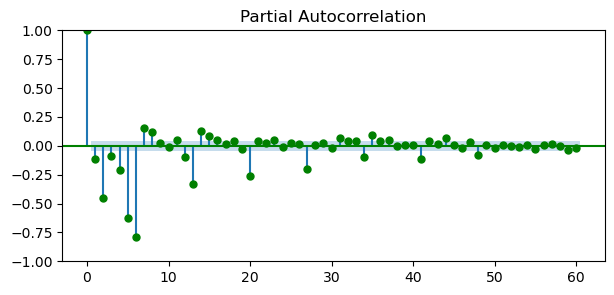

In [45]:
fig, ax = plt.subplots(figsize=(7,3))
plot_pacf(df1['erc_dif'], ax=ax, lags=60, color='green')
plt.show

In [46]:
train_data = df[:len(df)-200]
test_data = df[len(df)-200:]
test=test_data.copy()

In [47]:
train_data.shape, test_data.shape

((1838, 5), (200, 5))

In [48]:
test_data

erc  dm2  hta  anio  mes
fecha_egreso                          
2023-01-13    355  128   62  2023    1
2023-01-14    274   71   41  2023    1
2023-01-15    187   77   24  2023    1
2023-01-16    388  128   50  2023    1
2023-01-17    365  124   43  2023    1
...           ...  ...  ...   ...  ...
2023-07-27     50   59   14  2023    7
2023-07-28     30   34   13  2023    7
2023-07-29     24   16    5  2023    7
2023-07-30      8   15    3  2023    7
2023-07-31     18   21    6  2023    7

[200 rows x 5 columns]

In [49]:
# Modelo Auto-Arima
from pmdarima import auto_arima 

In [50]:
modelo_auto=auto_arima(train_data['erc'],start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=24092.353, Time=1.54 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=23021.161, Time=1.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=24081.919, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=22585.444, Time=2.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.99 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=22608.904, Time=0.66 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=6.68 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=8.52 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=inf, Time=5.04 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=21291.389, Time=7.73 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=inf, Time=3.16 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=inf, Time=24.10 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time

In [51]:
print(modelo_auto.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1838
Model:             SARIMAX(4, 1, 2)x(2, 1, [1], 12)   Log Likelihood              -10211.214
Date:                              Mon, 29 Jan 2024   AIC                          20444.427
Time:                                      22:35:22   BIC                          20505.030
Sample:                                  01-01-2018   HQIC                         20466.782
                                       - 01-12-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0593      0.762     -0.078      0.938      -1.552       1.434
ar.L1         -0.39

In [52]:
arima_model = SARIMAX(train_data["erc"], order = (4,1,2), seasonal_order = (2,1,1,12)) 
arima_result = arima_model.fit() 
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  erc   No. Observations:                 1838
Model:             SARIMAX(4, 1, 2)x(2, 1, [1], 12)   Log Likelihood              -10213.081
Date:                              Mon, 29 Jan 2024   AIC                          20446.163
Time:                                      22:35:48   BIC                          20501.256
Sample:                                  01-01-2018   HQIC                         20466.486
                                       - 01-12-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3795      0.023    -16.795      0.000      -0.424      -0.335
ar.L2          0.1467      0.015      9.570      0.000       0.117       0.177
ar.L3         -0.5248      0.013    -39.615      0.000      -0.551      -0.499
ar.L4         -0.7413      0.018    -41.455      0.000      -0.776      -0.706
ma.L1         -0.2153      0.030     -7.083      0.000      -0.275      -0.156
ma.L2         -0.5081      0.030    -17.017      0.000      -0.567      -0.450
ar.S.L12      -1.7479      0.008   -223.258      0.000      -1.763      -1.733
ar.S.L24      -0.9410      0.008   -123.755      0.000      -0.956      -0.926
ma.S.L12       0.7766      0.016     47.936      0.000       0.745       0.808
sigma2      3908.6032    113.309     34.495      0.000    3686.522    4130.684
===================================================================================
Ljung-Box (L1) (Q):                  22.72   Jarque-Bera (JB):                15.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.07
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

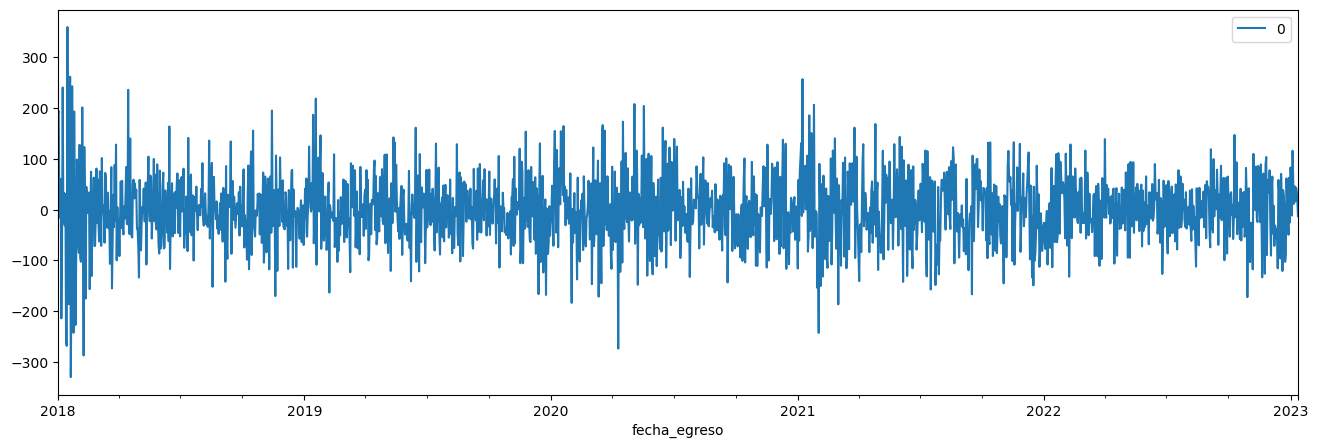

In [53]:
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

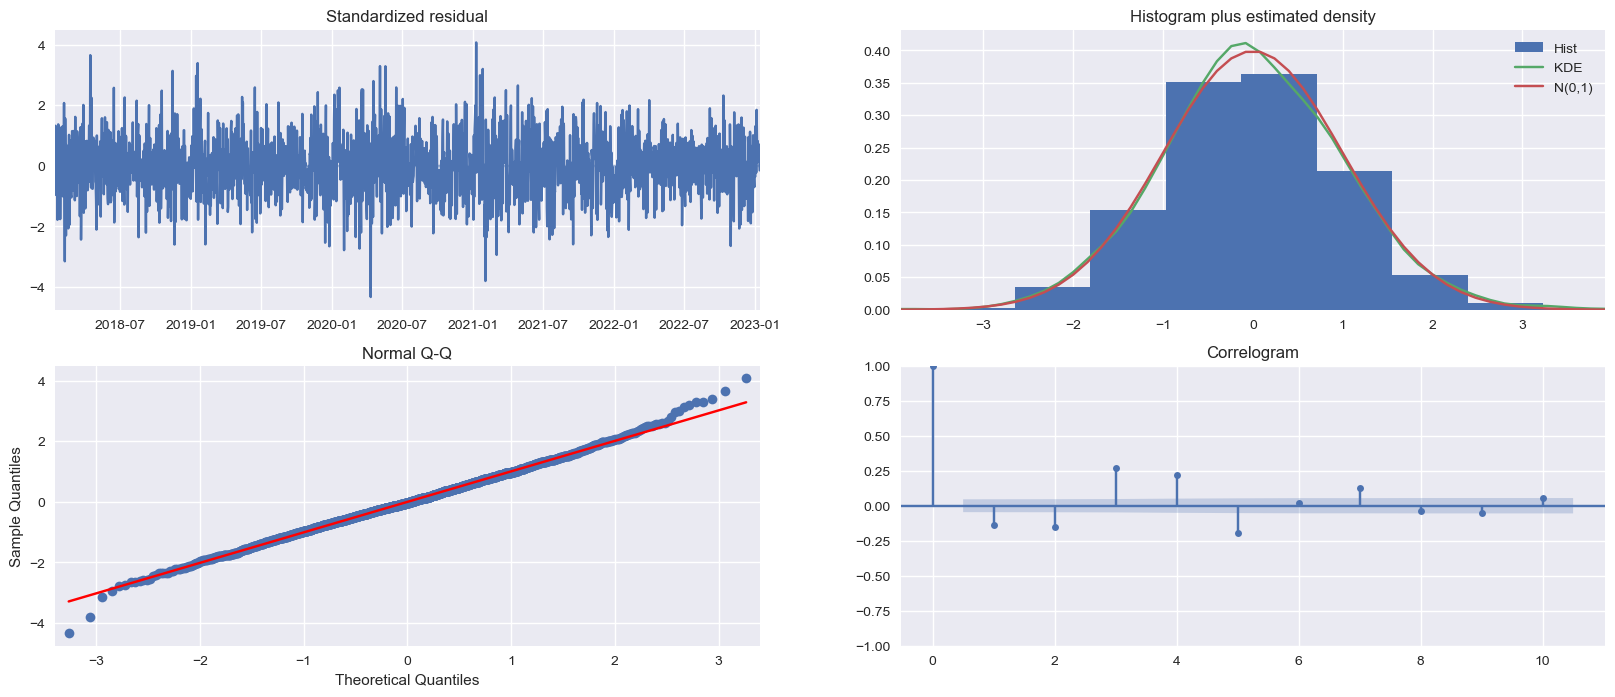

In [54]:
plt.style.use('seaborn')
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

In [55]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2023-01-13    309.068807
2023-01-14    271.911856
2023-01-15    203.425981
2023-01-16    372.657883
2023-01-17    356.608216
                 ...    
2023-07-27    360.980903
2023-07-28    362.647785
2023-07-29    266.164530
2023-07-30    294.037097
2023-07-31    284.796442
Freq: D, Name: ARIMA Predictions, Length: 200, dtype: float64

In [56]:
arima_pred2 = arima_result.predict(start='2018-01-01',end='2025-01-01', typ="levels").rename("ARIMA Predictions")
arima_pred2

2018-01-01      0.000000
2018-01-02    189.366096
2018-01-03    384.915176
2018-01-04    411.370901
2018-01-05    386.283124
                 ...    
2024-12-28    337.535102
2024-12-29    409.581728
2024-12-30    388.898751
2024-12-31    428.996693
2025-01-01    368.180044
Freq: D, Name: ARIMA Predictions, Length: 2558, dtype: float64

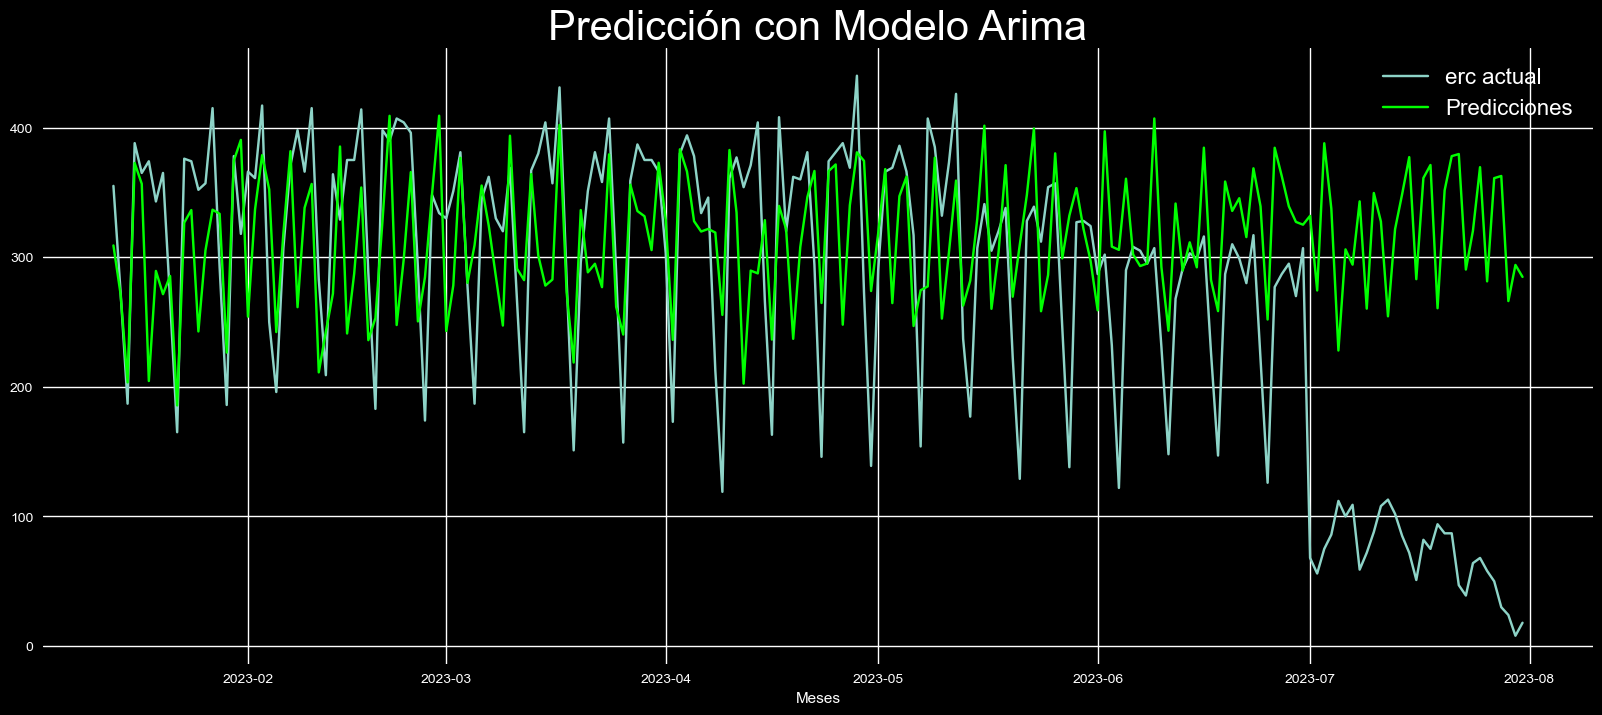

In [57]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["erc"], label="erc actual")
plt.plot(arima_pred, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

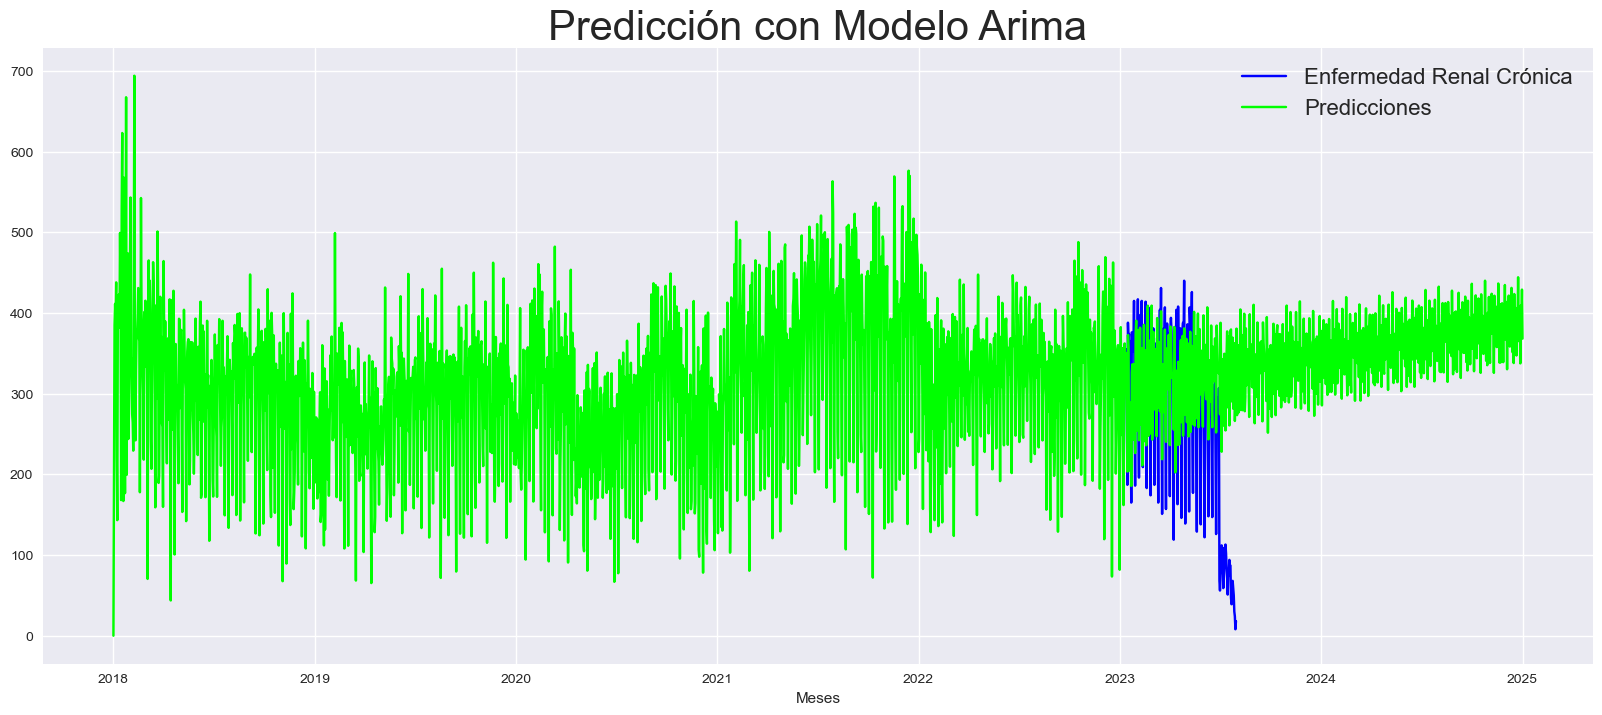

In [58]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["erc"],color="blue" ,label="Enfermedad Renal Crónica")
plt.plot(arima_pred2, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

In [59]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [60]:
evaluacion_metrica(test_data['erc'],arima_pred)

Evaluation metric results:-
MSE is : 14649.78811656333
MAE is : 88.5040355977383
RMSE is : 121.03630908352802
MAPE is : 102.76126912904256
R2 is : -0.13405727319105276



In [ ]:
test_data['ARIMA_Predictions'] = arima_pred